# Final Project

CS 216: Annie Sawers, Casey Syal, Jamie Kramer, Julia Mitchell

In [1]:
# Import Statements
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

intakes = pd.read_csv("Austin_Animal_Center_Intakes.csv")
outcomes = pd.read_csv("Austin_Animal_Center_Outcomes.csv")
map_df = pd.read_csv("Austin_Animal_Center_Stray_Map.csv")

## Description of Datasets

### Intakes:
* **Animal ID**: Unique ID of animal
* **Name**: The animal's name
* **Date**: Date of intake (YYYY/MM/DD)
* **Found Location**: Location where animal was found
* **Intake Type**: The type of intake (stray, owner surrender, etc.)
* **Intake Condition**: Condition upon intake
* **Animal Type**: Species of animal
* **Sex upon Intake**: Neutered Condition & Gender
* **Age**: In years
* **Breed**: Animal Breed
* **Color**: Color of animal's coat

### Outcomes:
* **Animal ID**: Unique ID of animal
* **Name**: The animal's name
* **Date**: Date of outcome (YYYY/MM/DD)
* **Birthday**: YYYY/MM/DD
* **Outcome Type**: The type of outcome (adoption, euthanasia, etc.)
* **Outcome Subtype**
* **Animal Type**: Species of animal
* **Sex upon Outcome**: Neutered Condition & Gender
* **Age**: In years
* **Breed**: Animal Breed
* **Color**: Color of animal's coat

## Data Cleaning

In [2]:
# Age Upon Intake
arr1 = []
for age1 in intakes["Age upon Intake"]:
    lst1 = age1.split()
    if lst1[1].startswith("year"):
        arr1.append(int(lst1[0]))
    elif lst1[1].startswith("month"):
        arr1.append(int(lst1[0])/12)
    elif lst1[1].startswith("week"):
        arr1.append(int(lst1[0])/52)
    elif lst1[1].startswith("day"):
        arr1.append(int(lst1[0])/365)
intakes["Age"] = arr1
intakes = intakes.drop(columns=['Age upon Intake'])

In [3]:
# Age Upon Outcome
outcomes = outcomes[outcomes["Age upon Outcome"].notnull()]
arr2 = []
for age2 in outcomes["Age upon Outcome"]:
    lst2 = age2.split(" ")
    if lst2[1].startswith("year"):
        arr2.append(int(lst2[0]))
    elif lst2[1].startswith("month"):
        arr2.append(int(lst2[0])/12)
    elif lst2[1].startswith("week"):
        arr2.append(int(lst2[0])/52)
    elif lst2[1].startswith("day"):
        arr2.append(int(lst2[0])/365)
outcomes["Age"] = arr2
outcomes = outcomes.drop(columns=['Age upon Outcome'])

In [4]:
# Date Time Intake
arr = []
for date in intakes["DateTime"]:
    lst = date.split()
    arr.append(datetime.strptime(lst[0], '%m/%d/%Y'))
intakes["Date"] = arr
intakes = intakes.drop(columns=['DateTime', 'MonthYear'])

In [5]:
# Date Time Outcome
arr = []
months = []
for date in outcomes["DateTime"]:
    lst = date.split()
    arr.append(datetime.strptime(lst[0], '%m/%d/%Y'))
    months.append(lst[0][:2])
outcomes["Date"] = arr
outcomes["Month"] = months
outcomes = outcomes.drop(columns=['DateTime', 'MonthYear'])

In [6]:
# Date of Birth
arr = []
for date in outcomes["Date of Birth"]:
    arr.append(datetime.strptime(date, '%m/%d/%Y'))
outcomes["Birthday"] = arr
outcomes = outcomes.drop(columns=['Date of Birth'])

In [7]:
print(intakes.head())
print(outcomes.head())

  Animal ID     Name                       Found Location Intake Type  \
0   A786884   *Brock  2501 Magin Meadow Dr in Austin (TX)       Stray   
1   A706918    Belle     9409 Bluegrass Dr in Austin (TX)       Stray   
2   A724273  Runster   2818 Palomino Trail in Austin (TX)       Stray   
3   A665644      NaN                          Austin (TX)       Stray   
4   A682524      Rio        800 Grove Blvd in Austin (TX)       Stray   

  Intake Condition Animal Type Sex upon Intake  \
0           Normal         Dog   Neutered Male   
1           Normal         Dog   Spayed Female   
2           Normal         Dog     Intact Male   
3             Sick         Cat   Intact Female   
4           Normal         Dog   Neutered Male   

                                   Breed        Color       Age       Date  
0                             Beagle Mix     Tricolor  2.000000 2019-01-03  
1               English Springer Spaniel  White/Liver  8.000000 2015-07-05  
2                            

## What Might Contribute to Adoption? (EDA)

Created new column... 0 if died or euthanasia; 1 if adopted or rto-adopt

In [8]:
# What are the types of outcomes?
print(outcomes.groupby(outcomes["Outcome Type"])["Animal ID"].count())

# Subset of Outcomes in which animals were adopted
outcomes = outcomes[(outcomes["Outcome Type"] != "Return to Owner") & 
                   (outcomes["Outcome Type"] != "Relocate") & 
                   (outcomes["Outcome Type"] != "Missing") &
                   (outcomes["Outcome Type"] != "Disposal") &
                   (outcomes["Outcome Type"] != "Transfer")]
outcomes = outcomes[outcomes["Outcome Type"].notnull()]

outcomes["Adopted"] = outcomes["Outcome Type"].str.replace("Adoption", "1")
outcomes["Adopted"] = outcomes["Adopted"].str.replace("Rto-Adopt", "1")
outcomes["Adopted"] = outcomes["Adopted"].str.replace("Died", "0")
outcomes["Adopted"] = outcomes["Adopted"].str.replace("Euthanasia", "0")
print("\n")
print(outcomes.groupby(outcomes["Adopted"])["Animal ID"].count())

Outcome Type
Adoption           55347
Died                1156
Disposal             568
Euthanasia          8376
Missing               69
Relocate              22
Return to Owner    21517
Rto-Adopt            698
Transfer           36713
Name: Animal ID, dtype: int64


Adopted
0     9532
1    56045
Name: Animal ID, dtype: int64


### Intrinsic Factors on Adoption

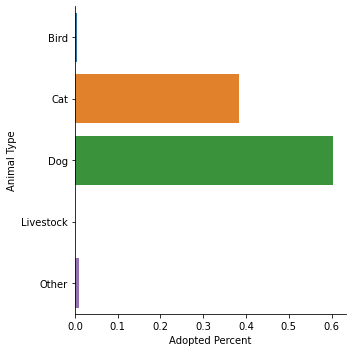

In [20]:
# Which species is adopted more?
adopted = outcomes[outcomes["Adopted"]=="1"]
total = adopted.shape[0]
adopted = adopted.groupby("Animal Type").count()
adopted.reset_index(inplace=True)
adopted.head()
adopted["Adopted Percent"] = adopted["Adopted"] / total

adopted.head()
sns.catplot(x='Adopted Percent', y="Animal Type", data=adopted, kind='bar')

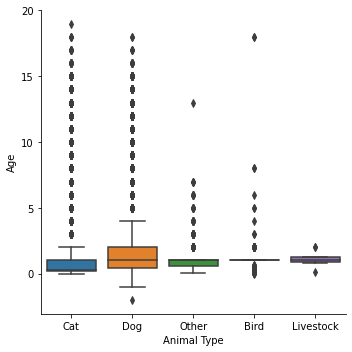

In [10]:
# How old are animals usually when they are adopted?
adopted = outcomes[outcomes["Adopted"]=="1"]
sns.catplot(data=adopted, x='Animal Type', y="Age", kind='box')

### Extrinsic Factors on Adoption

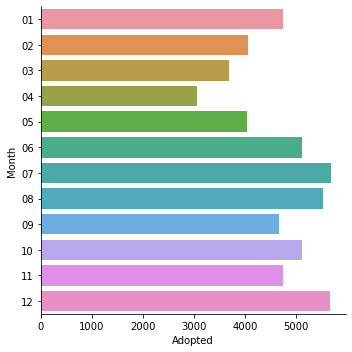

In [11]:
# What time of month are animals adopted?
adopted = outcomes[outcomes["Adopted"]=="1"]
adopted = adopted.groupby("Month").count()
adopted.reset_index(inplace=True)
sns.catplot(x='Adopted', y="Month", data=adopted, kind='bar')

## We need to do more EDA with the intakes dataset
merge intake condition and then figure out if condition has impact on adoption

also we should probably filter so that we are just looking at cat and dog